# Suyash Pratap Singh

# Task-2: To Explore Unsupervised Machine Learning(K- Means Clustering)

# Import Library

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Load the iris dataset

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\iris.csv')

# Print the first five row

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Print the random five row

In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
125,126,7.2,3.2,6.0,1.8,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica


# Properties and Shape of the dataset

In [6]:
print(df.info())             #full summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [7]:
print(df.describe())    #statistical details of the dataset

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
print(df.shape)      #shape of dataset

(150, 6)


# Check the data for any null values, count the number of null values in each column

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
print("total number of null values = ",df.isnull().sum().sum())

total number of null values =  0


# BoxPlot

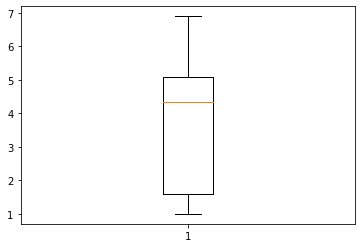

In [12]:
plt.boxplot(df['PetalLengthCm'])
plt.show()

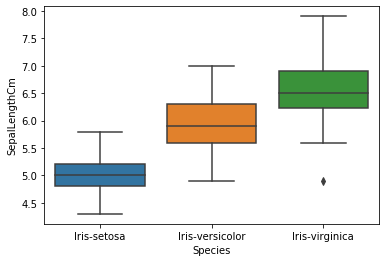

In [25]:
ax = sns.boxplot(x="Species", y="SepalLengthCm",data=df)

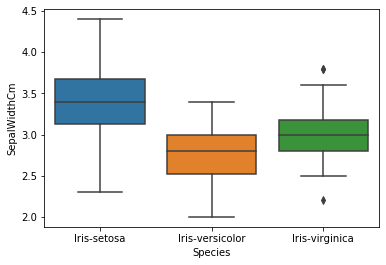

In [27]:
ax = sns.boxplot(x="Species", y="SepalWidthCm",data=df)

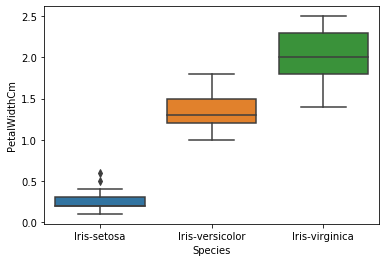

In [28]:
ax = sns.boxplot(x="Species", y="PetalWidthCm",data=df)

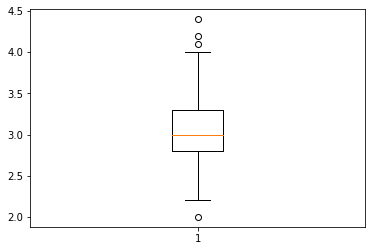

In [14]:
plt.boxplot(df['SepalWidthCm'])
plt.show()

# ScatterPlot

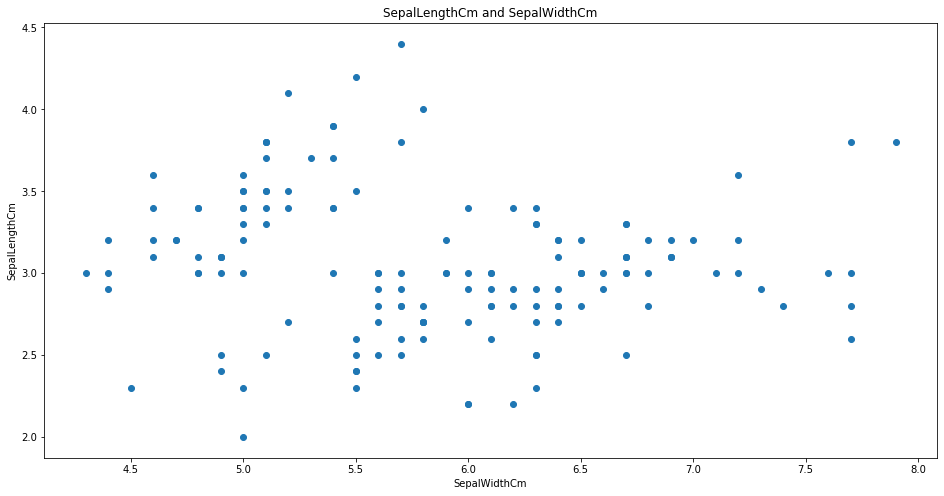

In [15]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['SepalLengthCm'],df['SepalWidthCm'])            #Plotting the distribution of scores
plt.title('SepalLengthCm and SepalWidthCm') 
ax.set_ylabel('SepalLengthCm')
ax.set_xlabel('SepalWidthCm')
plt.show()

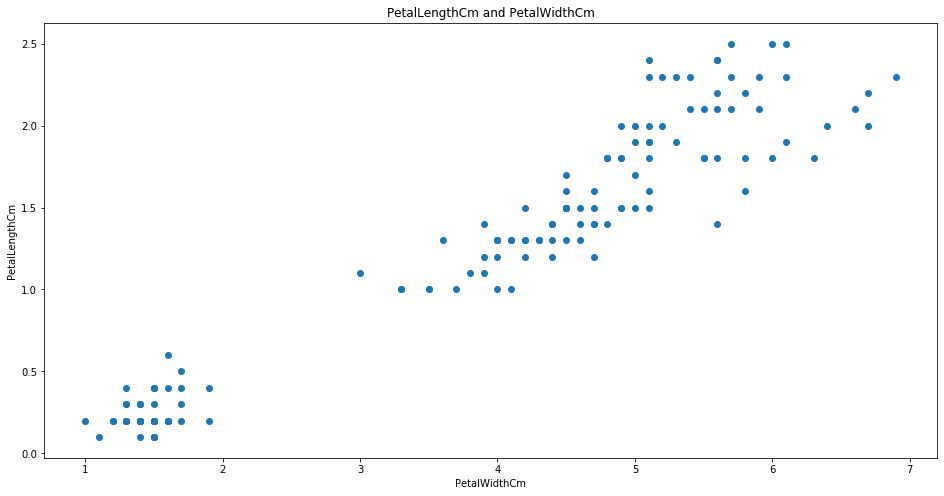

In [16]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['PetalLengthCm'],df['PetalWidthCm'])            #Plotting the distribution of scores
plt.title('PetalLengthCm and PetalWidthCm') 
ax.set_ylabel('PetalLengthCm')
ax.set_xlabel('PetalWidthCm')
plt.show()

# Visualizing Data

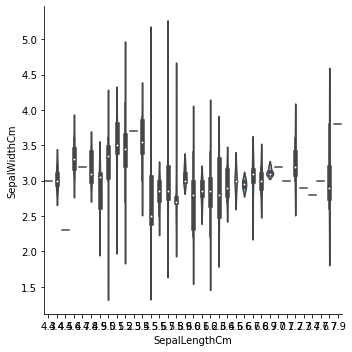

In [17]:
sns.catplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='violin')

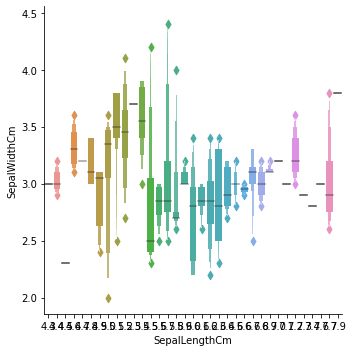

In [18]:
sns.catplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='boxen')

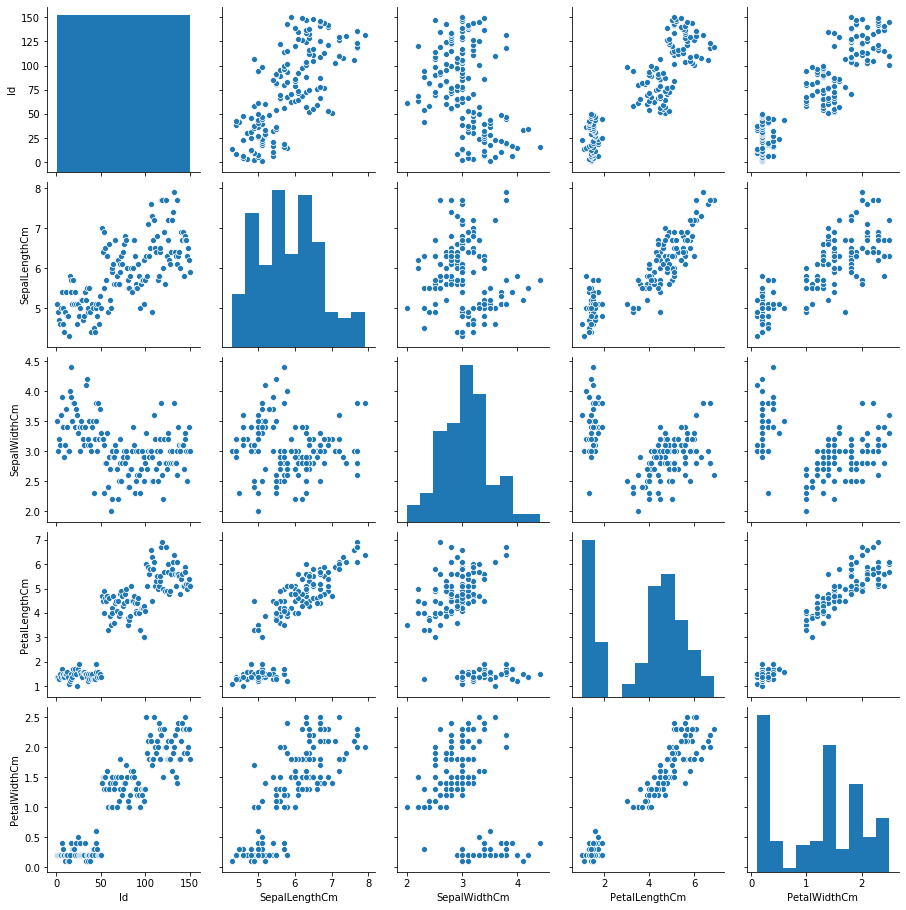

In [19]:
sns.pairplot(df)

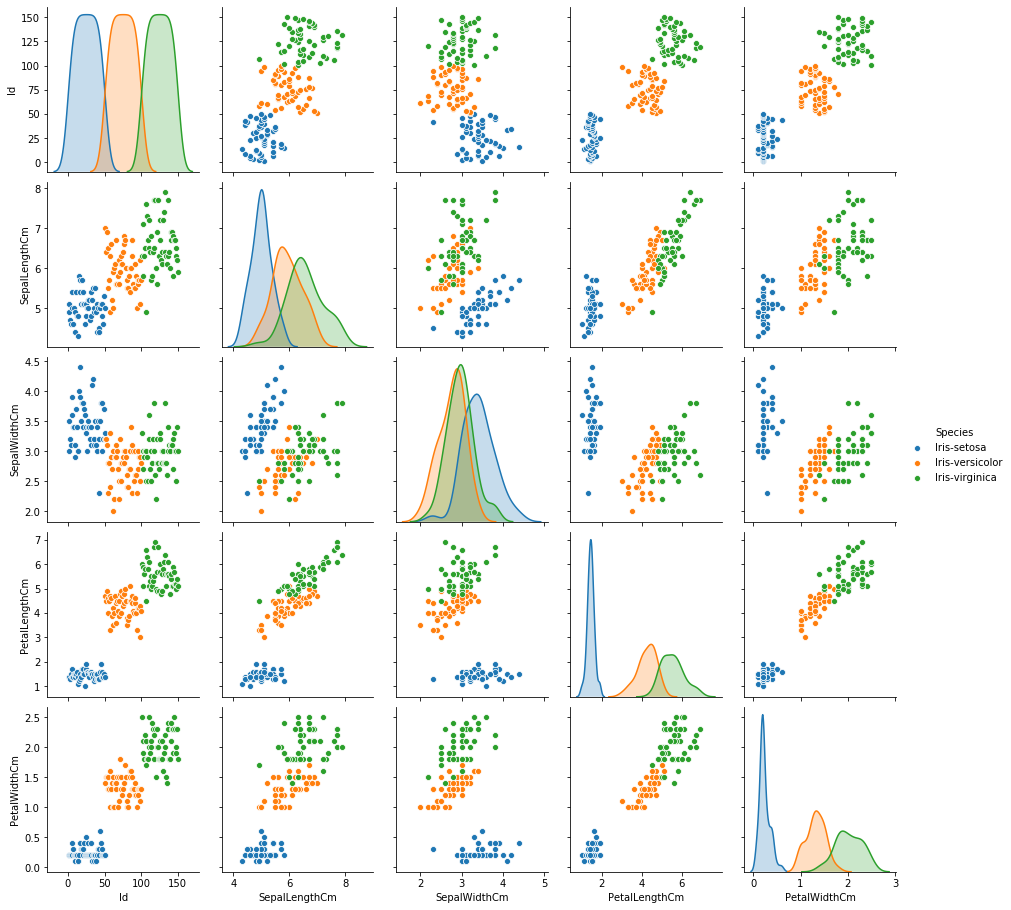

In [21]:
sns.pairplot(df,hue="Species")

In [23]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Heatmap

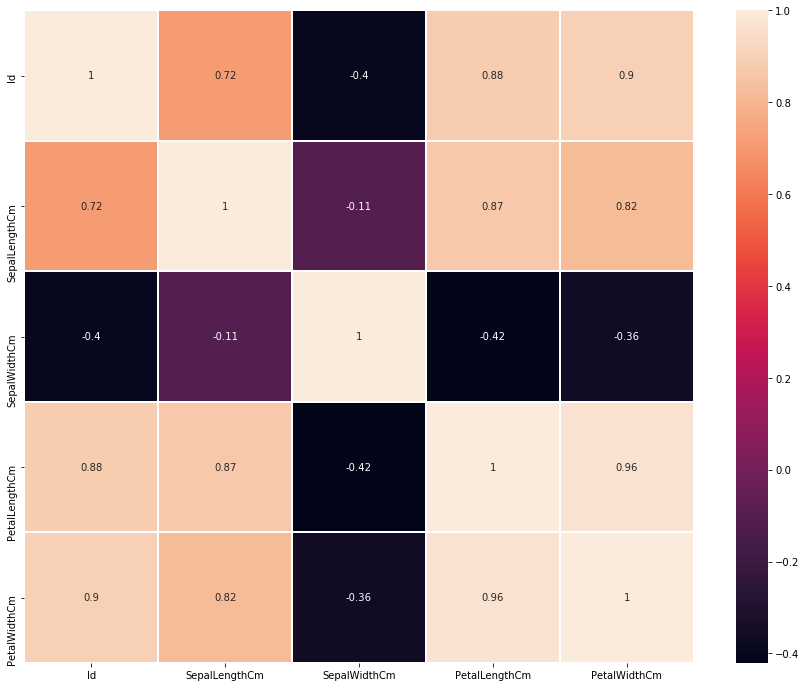

In [24]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

# Elbow Method using within-cluster-sum-of-squares(wcss)

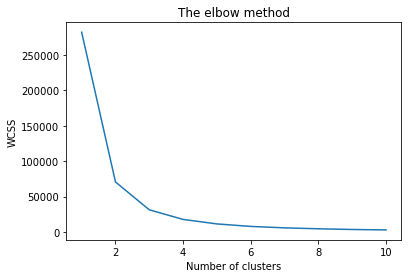

In [30]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Fitting using Kmeans++

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualizing clusering

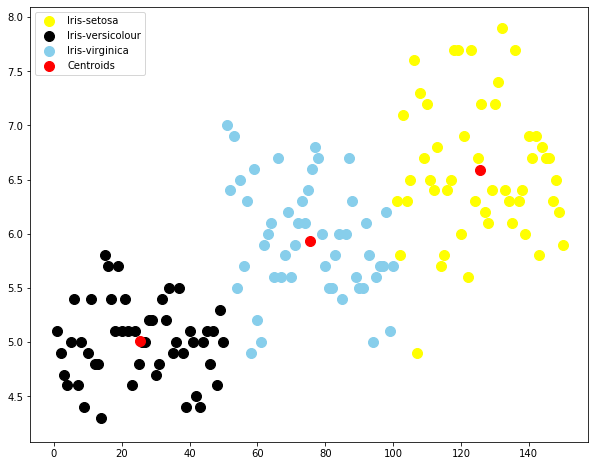

In [41]:
# The first two columns cluster visualizes
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'black', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'skyblue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()                                #[column(0),column(1)]

#  Thank You  